<a href="https://colab.research.google.com/github/Samuel-Wamwitha/Superstore-Data-Analysis/blob/master/Superstore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales Analysis

Analyzing superstore sales data is essential for store owners, managers, and analysts to understand the store's performance, identify trends, and make informed business decisions. Here are some key aspects of superstore sales analysis:

1. **Sales Revenue:** Tracking the total sales revenue over time provides insights into the overall financial performance of the superstore. It helps identify peak seasons and periods of high or low sales.

2. **Sales by Product Category:** Analyzing sales by product category (e.g., electronics, apparel, home goods) helps understand which categories are driving revenue and which may require improvement.

3. **Sales by Region:** Superstores often have multiple locations. Analyzing sales by region helps identify the best-performing stores and areas for expansion or improvement.

4. **Sales by Customer Segments:** Understanding sales patterns among different customer segments can inform targeted marketing strategies and customer engagement.

5. **Sales Trends:** Identifying sales trends over time, such as monthly or seasonal variations, can help in inventory management and marketing planning.

6. **Product Performance:** Analyzing individual product sales can help identify popular products, slow-moving items, and potential stockouts.

7. **Customer Behavior:** Studying customer behavior, such as purchase frequency, average transaction value, and repeat purchases, provides insights into customer preferences and loyalty.

8. **Promotions and Discounts:** Evaluating the impact of promotions and discounts on sales can help optimize marketing strategies.

9. **Sales Forecasting:** Using historical sales data, superstore owners and managers can forecast future sales, plan inventory levels, and make data-driven decisions.

To conduct thorough sales analysis, superstores often use data visualization tools, spreadsheets, or specialized retail analytics software. These tools help present the data in a visually appealing and easy-to-understand format, enabling better decision-making and strategic planning. Additionally, by integrating sales data with other metrics like profitability, inventory turnover, and customer satisfaction, superstore owners can gain a comprehensive view of their business performance.

## Data Cleaning

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
df = pd.read_csv("/content/superstore_final_dataset (1).csv", encoding='ISO-8859–1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [ ]:
# Checking the dimensions of the dataset
df.shape

(9800, 18)

In [ ]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Checking for null records in the data
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [ ]:
# Checking for duplicate records in the data
df.duplicated().sum()

0

## Data Analysis

In [ ]:
# Checking the different customer segments in the dataset
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
# Checking the different regions in the dataset
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
# Checking the different product categories in the dataset
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
# Counting the number of states
df.State.nunique()

49

In [ ]:
# Total sales made
df.Sales.sum()

2261536.7827000003

In [ ]:
# Average sales for the store
df.Sales.mean()

230.7690594591837

<ipython-input-13-238ad0572f93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sales)


<Axes: xlabel='Sales', ylabel='Density'>

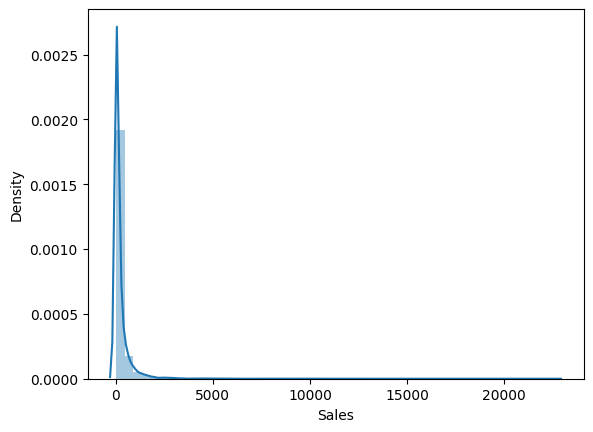

In [ ]:
sns.distplot(df.Sales)

Total Sales made by the store in the 4 years was $2,261,536.78

Average sales for the store was $230.77

The distribution plot shows that most sales made are below $2,500

<Axes: >

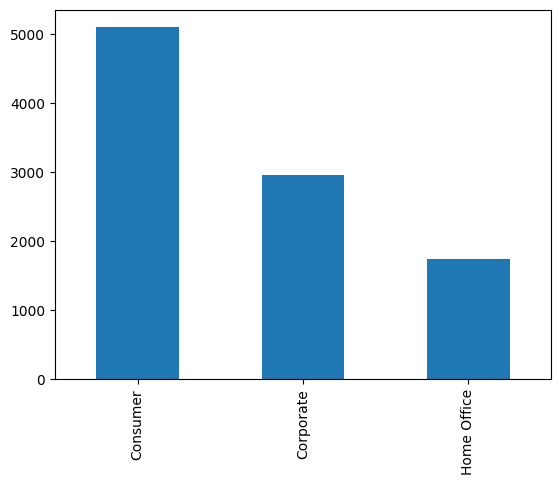

In [ ]:
# Plotting value counts of Segment
df['Segment'].value_counts().plot(kind='bar')

<Axes: >

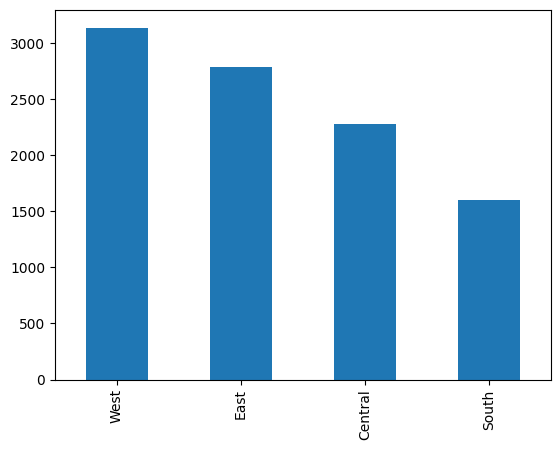

In [ ]:
# Plotting value counts of Region
df['Region'].value_counts().plot(kind='bar')

<Axes: >

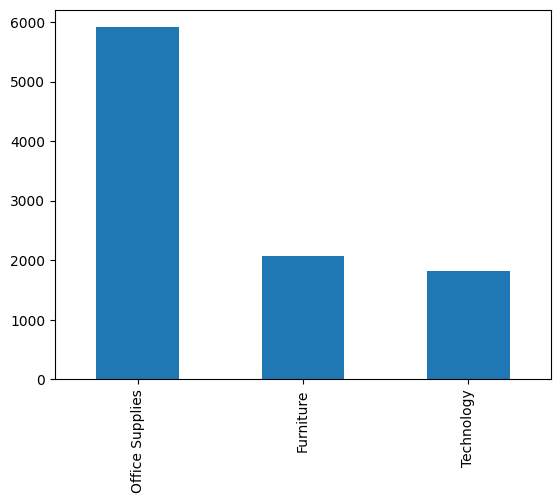

In [ ]:
# Plotting value counts of Category
df['Category'].value_counts().plot(kind='bar')

In [ ]:
df['Ship_Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship_Mode, dtype: int64

<Axes: >

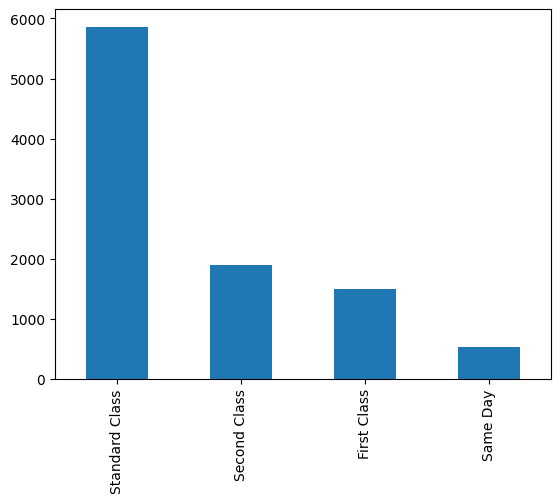

In [ ]:
# Plotting value counts of Ship mode
df['Ship_Mode'].value_counts().plot(kind = 'bar')

**Countplots Summary**

Most sales of the store are from Consumers and the least are from Home offices.

Most sales of the store are from West region and the least are from the South region.

Most sales made from the store were for Office supplies and the least were for Techology products.

Most sales were shipped by Standard class mode and the least were shipped by Same day mode.

In [ ]:
cat = df.groupby(['Category'])['Sales'].sum()
cat

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

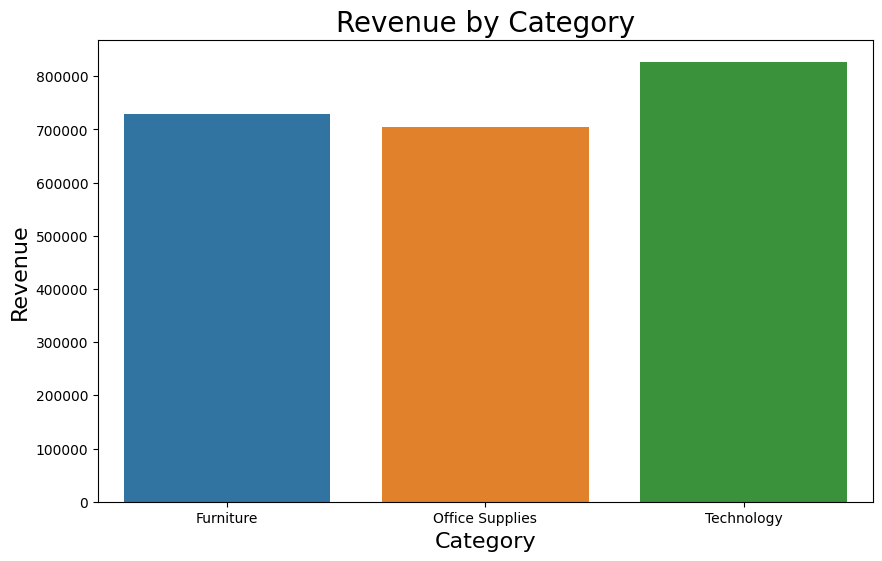

In [ ]:
# Plotting Revenue of each Category
plt.figure(figsize=(10,6))
cat_revenue = df.groupby(['Category'])['Sales'].sum().reset_index()
sns.barplot(x="Category", y="Sales", data=cat_revenue)

plt.title('Revenue by Category', fontsize = 20)
plt.xlabel('Category', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

Technology category of products brought the most revenue for the store despite the category having the least sales.

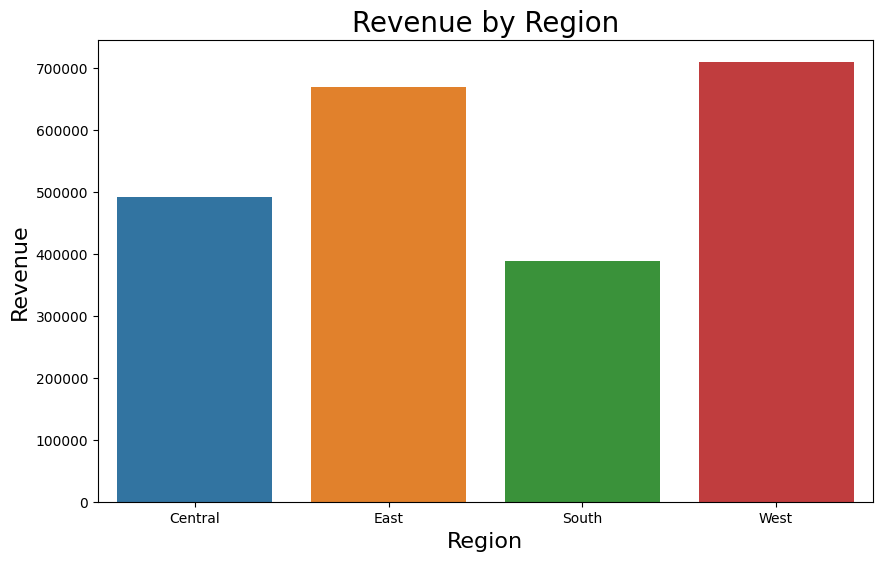

In [ ]:
# Plotting Revenue of each Region
plt.figure(figsize=(10,6))
reg_revenue = df.groupby(['Region'])['Sales'].sum().reset_index()
sns.barplot(x = 'Region', y = 'Sales', data = reg_revenue)

plt.title('Revenue by Region', fontsize = 20)
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The West region brought the most revenue for the store reflective of the sales the region received.

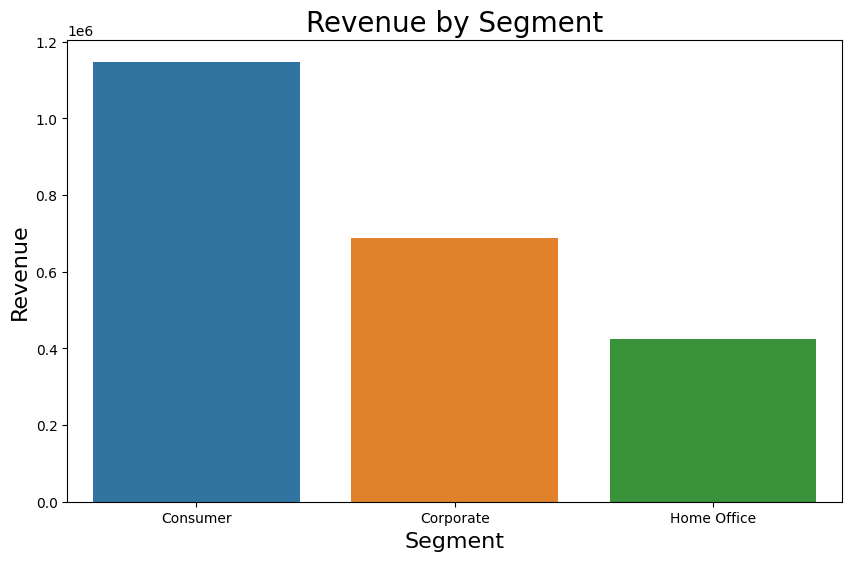

In [ ]:
# Plotting Revenue of each Segment
plt.figure(figsize=(10,6))
seg_revenue = df.groupby(['Segment'])['Sales'].sum().reset_index()
sns.barplot(x = 'Segment', y = 'Sales', data = seg_revenue)

plt.title('Revenue by Segment', fontsize = 20)
plt.xlabel('Segment', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The Consumer segment brought the most revenue for the store reflective of the sales the segment received.

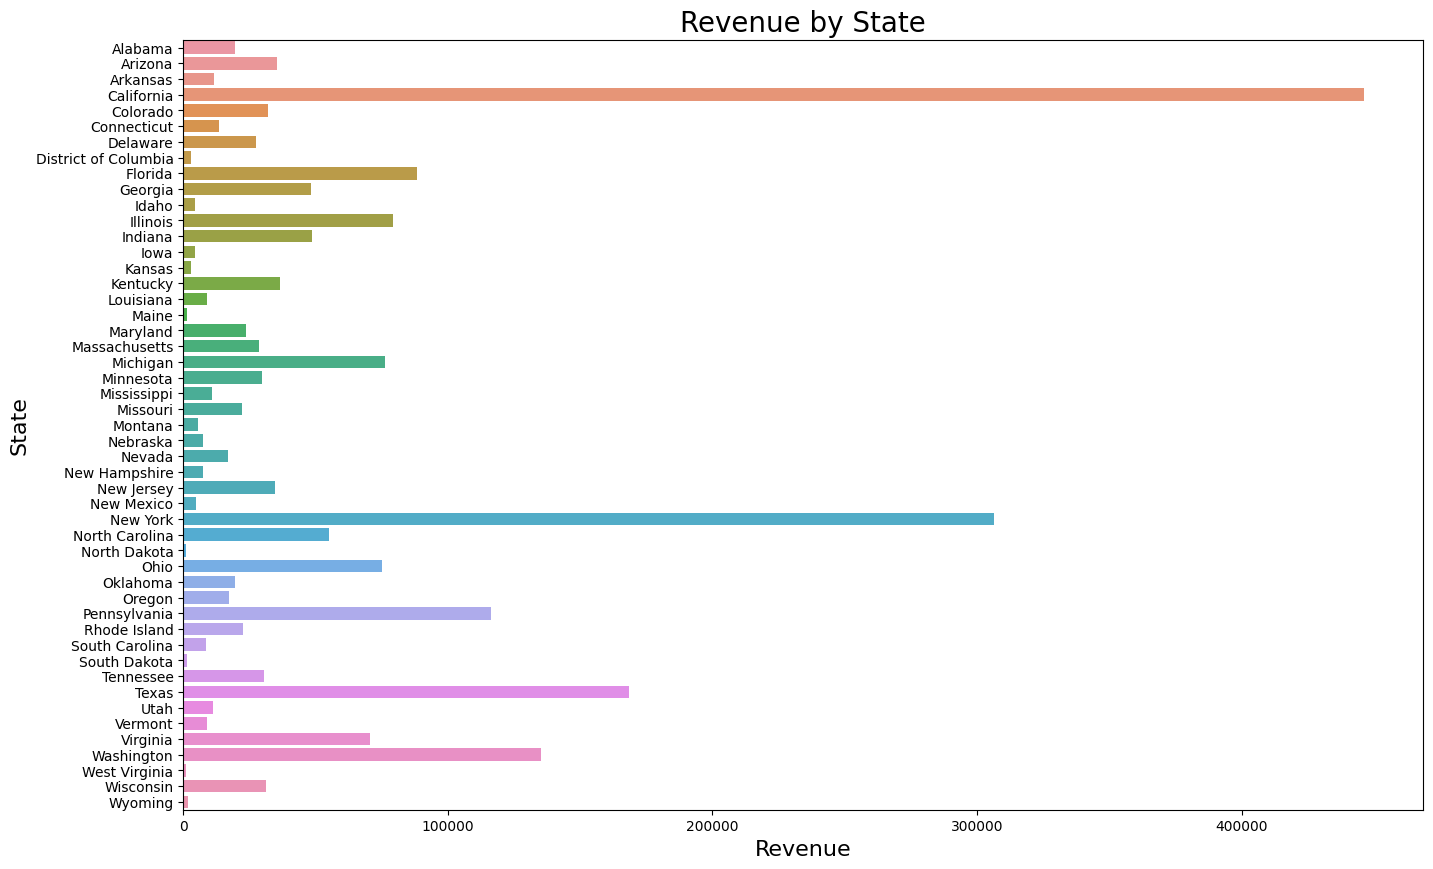

In [ ]:
# Plotting Revenue of each State
plt.figure(figsize=(16,10))
reg_revenue = df.groupby(['State'])['Sales'].sum().reset_index()
sns.barplot(x = 'Sales', y = 'State', data = reg_revenue, orient = 'h')

plt.title('Revenue by State', fontsize = 20)
plt.xlabel('Revenue', fontsize = 16)
plt.ylabel('State', fontsize = 16)

plt.show()

The states of California, New York, and Texas brought the most revenue for the store. This maybe influenced by the population of the states and the average income of the states.

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

df.head()

<ipython-input-61-88349c0a6419>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_Month,Order_Year
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,2017
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,2017
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,2017
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,2016
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,11,2016


In [ ]:
df['Order_Year'].unique()

array([2017, 2016, 2015, 2018])

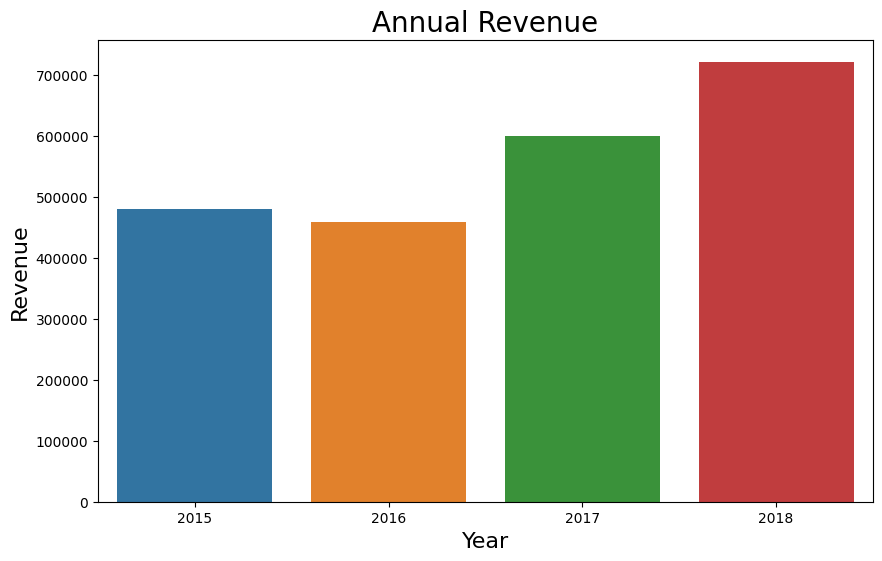

In [ ]:
# Plotting Annual Revenue
plt.figure(figsize=(10,6))
year_revenue = df.groupby(['Order_Year'])['Sales'].sum().reset_index()
sns.barplot(x = 'Order_Year', y = 'Sales', data = year_revenue)

plt.title('Annual Revenue', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The store gradually increased its revenue from 2015 to 2018 with the store making a revenue of around 700,000 in 2018 compared to above 400,000 in 2015.

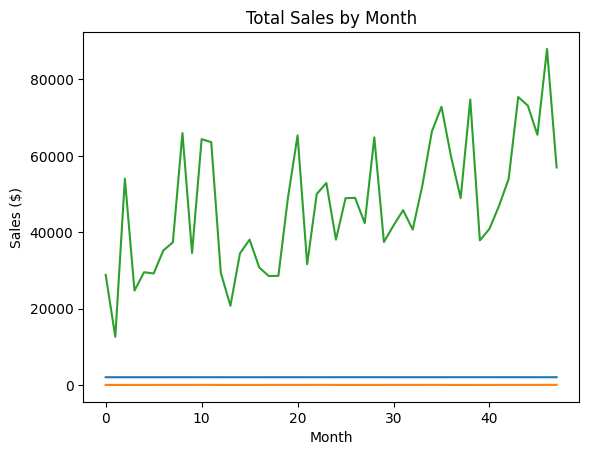

In [ ]:
# Total Sales by Month
sales_by_month = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()
plt.plot(sales_by_month.index, sales_by_month.values)

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')

plt.show()

The monthly sales also indicate gradual increase of sales although there were some months where the sales dropped significantly.

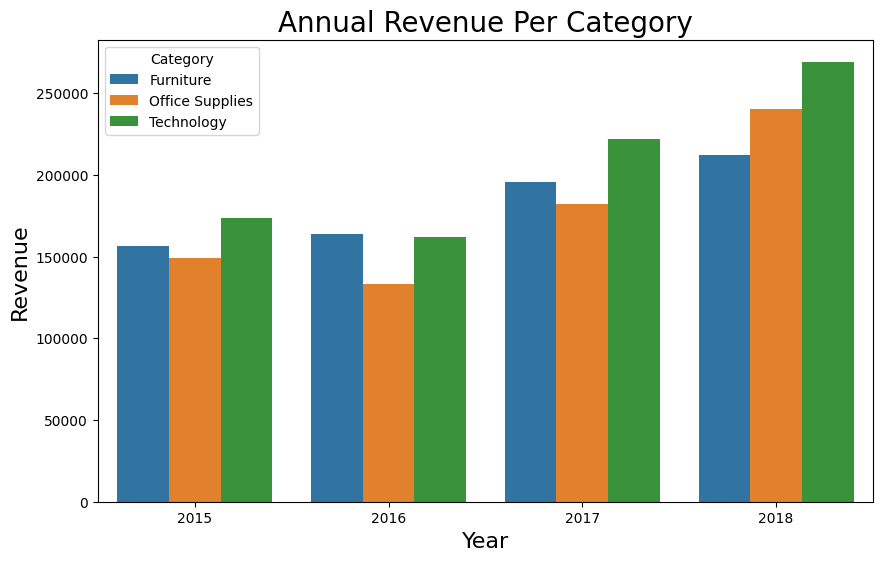

In [ ]:
# Plotting Annual Revenue of each Category
plt.figure(figsize=(10,6))
year_revenue = df.groupby(['Order_Year', 'Category'])['Sales'].sum().reset_index()
sns.barplot(x = 'Order_Year', y = 'Sales', hue = 'Category', data = year_revenue)

plt.title('Annual Revenue Per Category', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The graph indicates all categories had increased in revenue over the years except from 2016 when the sales of categories dropped compared to 2015.

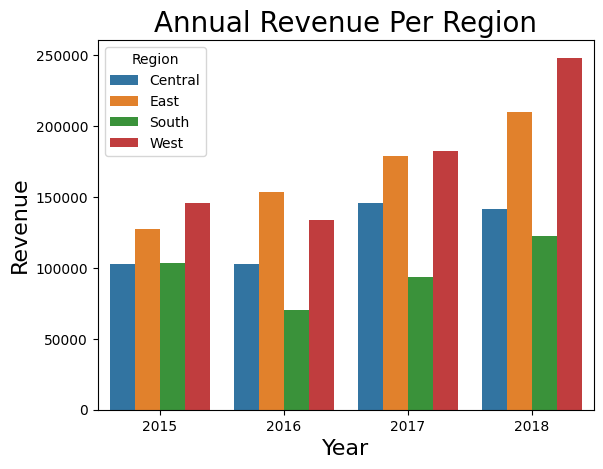

In [ ]:
# Plotting Annual Revenue of each Region
year_revenue = df.groupby(['Order_Year', 'Region'])['Sales'].sum().reset_index()
sns.barplot(x = 'Order_Year', y = 'Sales', hue = 'Region', data = year_revenue)

plt.title('Annual Revenue Per Region', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The graph indicates East and West regions had gradual increase of revenue over the years while the Central and South regions had fluctuating revenues over the years.

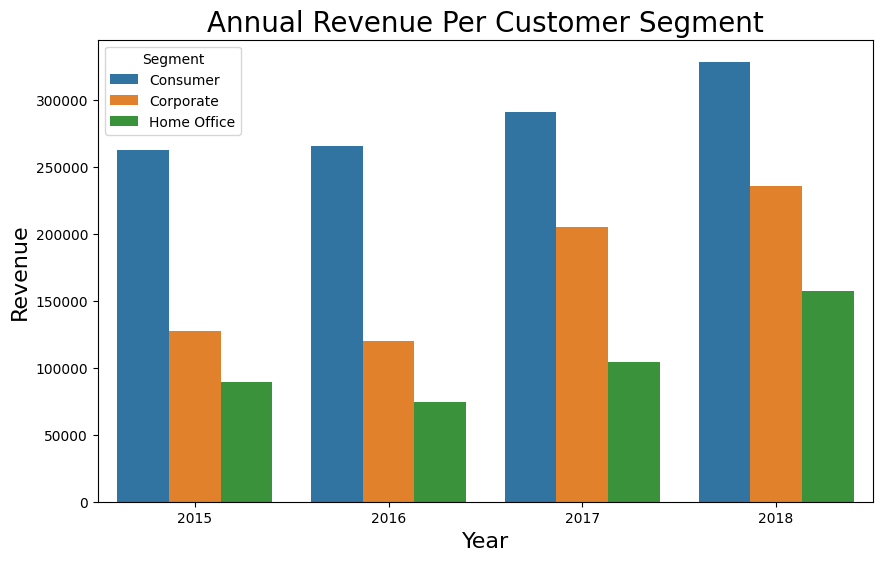

In [ ]:
# Plotting Annual Revenue of each Customer Segment
plt.figure(figsize=(10,6))
year_revenue = df.groupby(['Order_Year', 'Segment'])['Sales'].sum().reset_index()
sns.barplot(x = 'Order_Year', y = 'Sales', hue = 'Segment', data = year_revenue)

plt.title('Annual Revenue Per Customer Segment', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The graph indicates all customer segments had gradual increase of revenue over the years.

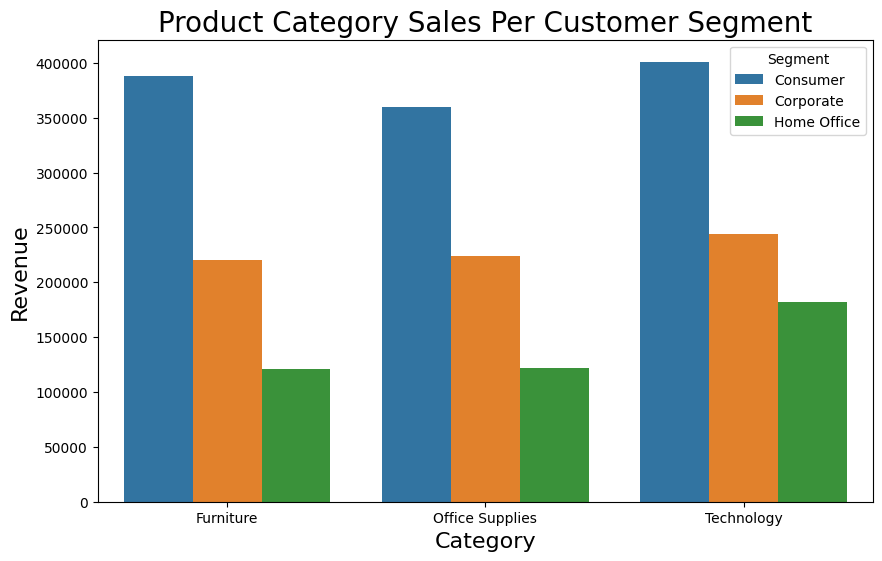

In [ ]:
# Plotting Product Category Sales per Customer Segment
plt.figure(figsize=(10,6))
year_revenue = df.groupby(['Category', 'Segment'])['Sales'].sum().reset_index()
sns.barplot(x = 'Category', y = 'Sales', hue = 'Segment', data = year_revenue)

plt.title('Product Category Sales Per Customer Segment', fontsize = 20)
plt.xlabel('Category', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

The graph indicates most of the revenue derived for all product categories were from the was from the consumer customer segments.

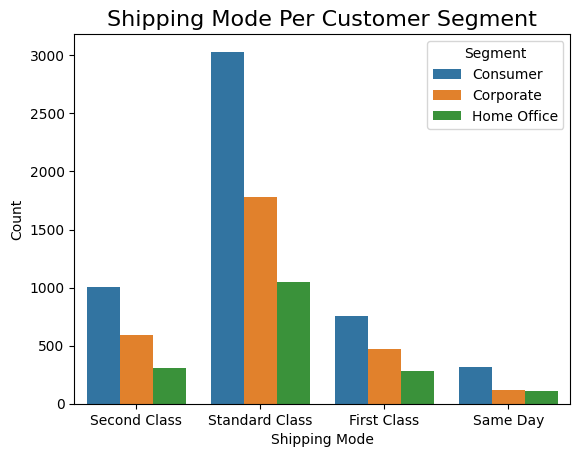

In [ ]:
sns.countplot(x='Ship_Mode',hue='Segment',data=df)

plt.title('Shipping Mode Per Customer Segment', fontsize = 16)
plt.xlabel('Shipping Mode', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

plt.show()

Most used shipping mode by the different customer segments was Standard class.

The same data was visualized in Tableau, click the following link to see the visualizations https://public.tableau.com/views/SuperstoreDataVisualization_16906196699420/Dashboard2?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link